In [44]:
### Predict loan approval-> D.v->Loan_status->Classification

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [46]:
df=pd.read_csv("loan_prediction.csv")

In [47]:
df.shape

(614, 13)

In [48]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N
275,LP001900,Male,Yes,1,Graduate,No,2750,1842.0,115.0,360.0,1.0,Semiurban,Y
51,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
291,LP001938,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
70,LP001243,Male,Yes,0,Graduate,No,3208,3066.0,172.0,360.0,1.0,Urban,Y
241,LP001800,Male,Yes,1,Not Graduate,No,2510,1983.0,140.0,180.0,1.0,Urban,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
217,LP001726,Male,Yes,0,Graduate,No,3727,1775.0,131.0,360.0,1.0,Semiurban,Y


In [49]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [51]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Data Visualization??->Complete this

### Data Preparation

##### Dropping insignificant columns

In [52]:
df=df.drop(["Loan_ID"],axis=1) #axis=1 means column ,axis=0 means row

In [53]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
### Dealing missing values
loanamount_median=df["LoanAmount"].median()

In [55]:
loanamount_median

128.0

In [56]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,loanamount_median)

In [57]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Do for loanamountterm and credithistory

In [58]:
Gender_mode=df["Gender"].mode()[0]
Gender_mode

'Male'

In [59]:
df["Gender"]=df["Gender"].replace(np.nan,Gender_mode)

In [60]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Try for Married,Dependents,Selfemployed

### Outlier Tratment(Optional)

<Axes: xlabel='ApplicantIncome'>

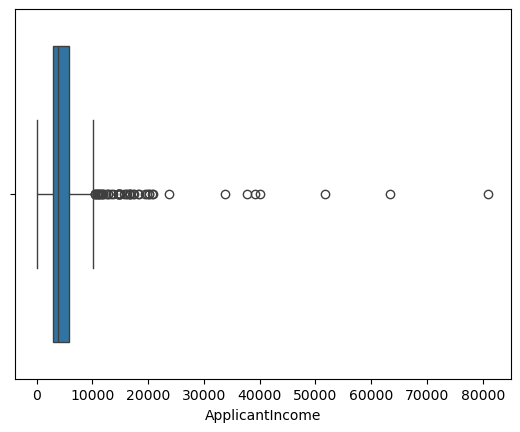

In [61]:
sns.boxplot(x="ApplicantIncome",data=df)

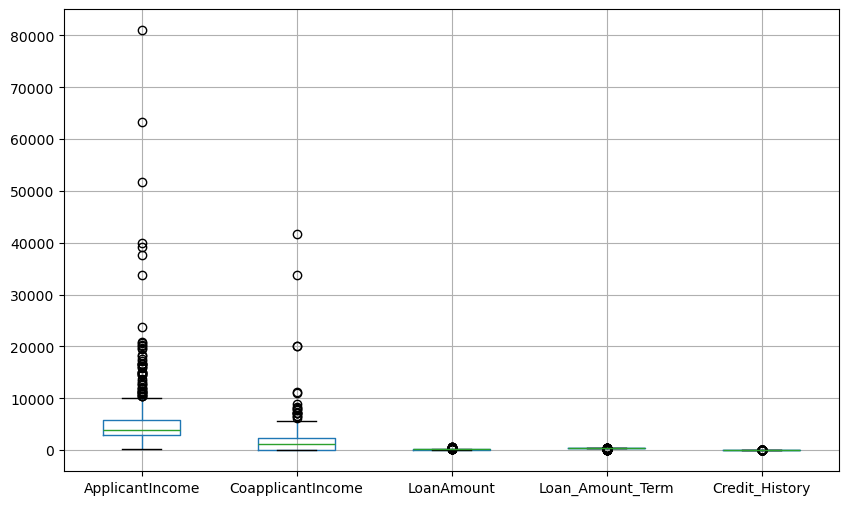

In [62]:
df.boxplot(figsize=(10,6)) 
plt.show()

In [63]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [64]:
df["Loan_Amount_Term"].nunique()

10

In [65]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

#### remove outliers in applicant income

In [66]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    lower_range=q1-(1.5*iqr)
    upper_range=q3+(1.5*iqr)
    return lower_range,upper_range

In [67]:
lowapp,uppapp=remove_outlier(df["ApplicantIncome"])
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]>uppapp,uppapp,df["ApplicantIncome"])
df["ApplicantIncome"]=np.where(df["ApplicantIncome"]<lowapp,lowapp,df["ApplicantIncome"])

<Axes: xlabel='ApplicantIncome'>

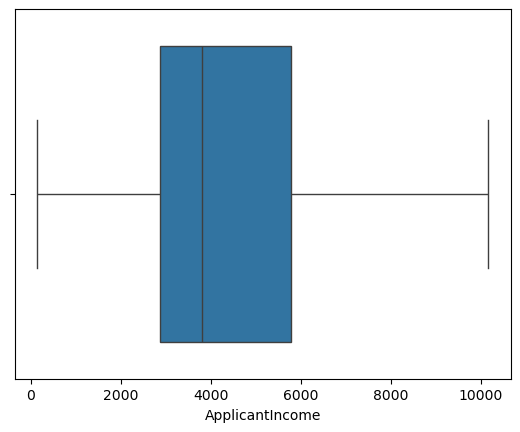

In [68]:
sns.boxplot(x="ApplicantIncome",data=df)

In [69]:
df.shape

(614, 12)

### Try for coapplicant income,loanamount

In [70]:
lowcoapp,uppcoapp=remove_outlier(df["CoapplicantIncome"])
df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]>uppcoapp,uppcoapp,df["CoapplicantIncome"])
df["CoapplicantIncome"]=np.where(df["CoapplicantIncome"]<lowcoapp,lowcoapp,df["CoapplicantIncome"])

<Axes: xlabel='CoapplicantIncome'>

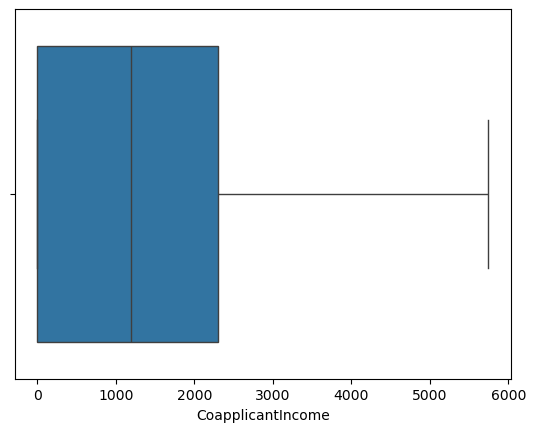

In [71]:
sns.boxplot(x="CoapplicantIncome",data=df)